## LASSO回归

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

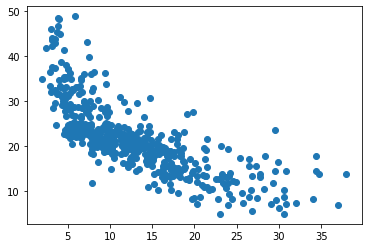

In [2]:
boston = datasets.load_boston()
x = boston.data[:,12]
y = boston.target

x = x[y<50]
y = y[y<50]

plt.scatter(x,y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()) 
    ])

In [5]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [6]:
from sklearn.metrics import mean_squared_error
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

958649.3039496315

In [7]:
def show_plot(model):
    plt.scatter(x, y)
    X_plot = np.linspace(0, 40, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot[:,0], y_plot, color='red')
    plt.axis([0, 40, 0, 50])
    plt.show()

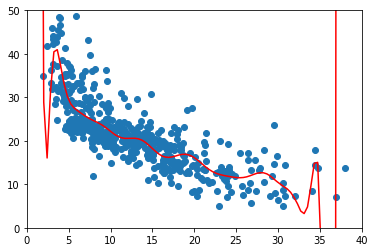

In [8]:
show_plot(poly_reg)

In [9]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [10]:
lasso_reg = LassoRegression(20, 1)
lasso_reg.fit(X_train, y_train)
y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

29.29896787848834

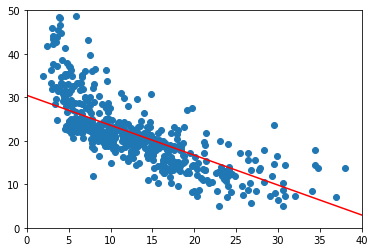

In [11]:
show_plot(lasso_reg)

## 岭回归

In [12]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [17]:
ridge_reg = RidgeRegression(20, 100)
ridge_reg.fit(X_train, y_train)
y_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

28.488607370708703

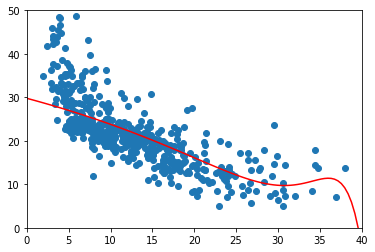

In [18]:
show_plot(ridge_reg)